## The Knowledge House Data Science

## Introduction to Bayesian Inference




## Lab Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



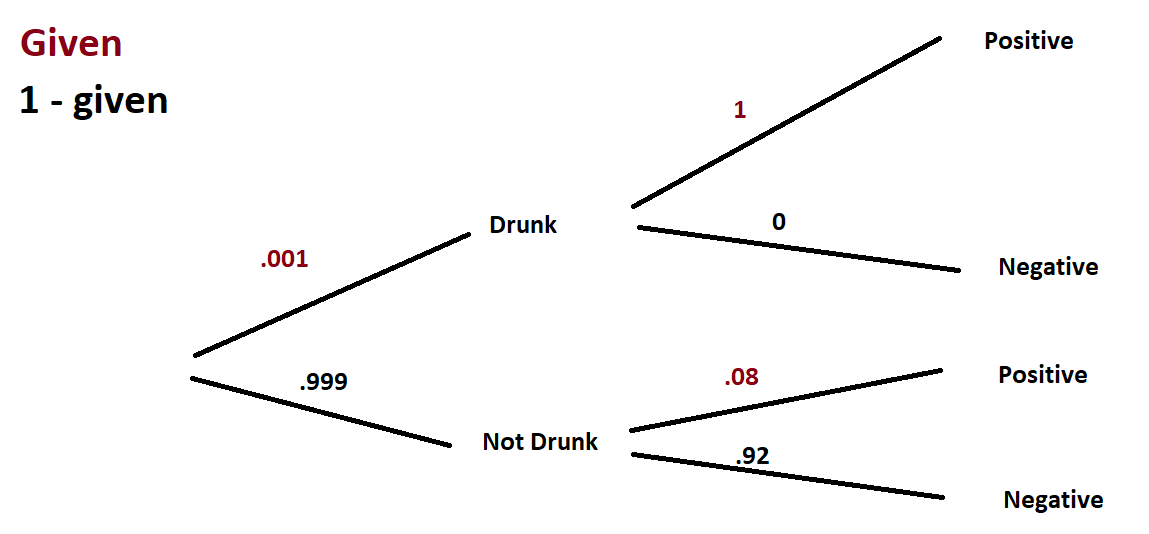

In [ ]:
# https://thestatsninja.com/2019/03/03/how-to-decipher-false-positives-and-negatives-with-bayes-theorem/
# What is the probability that a person is drunk after one positive breathalyzer test?

# P(drunk|positive) = P(drunk)P(false positive RATE) all over P(drunk)P(false positive RATE) + P(not drunk)P(true positive RATE)
# The probability of an event and its complement must equal 1 so this allows me to get the other 3 values in the above tree diagram and (1-prior) below
# 'positive' is the common factor since thats the condition

# given: 'an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000.'
# so there's 3 params (prior=.001,falsepos = .08, truepos = 1)

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  numerator = true_positive_rate * prob_drunk_prior
  denominator = true_positive_rate * prob_drunk_prior + false_positive_rate * (1 - prob_drunk_prior)
  return numerator/denominator

#(.001)(1) all over
#(.001)(1) + (.999)(.08)

test1 = prob_drunk_given_positive(.001,.08,1)
print(f'There is a {round(test1,4)} chance a person is drunk after one positive breathalyzer test.')
test1

There is a 0.0124 chance a person is drunk after one positive breathalyzer test.


0.012357884330202669

In [ ]:
# What is the probability that a person is drunk after two positive breathalyzer tests?
# 'prior' param changes after each test because the probability changes over time, given new data 

test2 = prob_drunk_given_positive(test1,.08,1)
print(f'There is a {round(test2,4)} chance a person is drunk after two positive breathalyzer tests.')
test2

There is a 0.1353 chance a person is drunk after two positive breathalyzer tests.


0.13525210993291495

In [ ]:
# How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?
# A while loop is used to keep running tests until probability is greater than 95% and to keep track of how many tests that takes.
count = 0
prior = .001

while prior<=.95:
  prior = prob_drunk_given_positive(prior,.08,1)
  count+=1

print(f'{count} tests are needed for probability to be greater than 95%.')
print(f'There is a {round(prior,4)} chance a person is drunk after {count} positive breathalyzer tests')

4 tests are needed for probability to be greater than 95%.
There is a 0.9607 chance a person is drunk after 4 positive breathalyzer tests


In [ ]:
# Extra
prior = .001
for count in range(1,11):
  prior = prob_drunk_given_positive(prior,.08,1)
  print(f'There is a {round(prior,8)} chance a person is drunk after {count} positive breathalyzer test(s).')

There is a 0.01235788 chance a person is drunk after 1 positive breathalyzer test(s).
There is a 0.13525211 chance a person is drunk after 2 positive breathalyzer test(s).
There is a 0.6615997 chance a person is drunk after 3 positive breathalyzer test(s).
There is a 0.96068951 chance a person is drunk after 4 positive breathalyzer test(s).
There is a 0.99673716 chance a person is drunk after 5 positive breathalyzer test(s).
There is a 0.99973819 chance a person is drunk after 6 positive breathalyzer test(s).
There is a 0.99997905 chance a person is drunk after 7 positive breathalyzer test(s).
There is a 0.99999832 chance a person is drunk after 8 positive breathalyzer test(s).
There is a 0.99999987 chance a person is drunk after 9 positive breathalyzer test(s).
There is a 0.99999999 chance a person is drunk after 10 positive breathalyzer test(s).


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)